Se quiere saber a partir de diversos datos meteorológicos si es un buen día para jugar al tenis.
Utilizando el archivo tenis.csv:

- Obtener los datos
- Entrenar el modelo
- Realizar predicciones y evaluar el modelo

¿Qué resultados da el modelo? ¿Por qué?

¿Qué resultado se obtiene para las siguientes condiciones?

- Outlook: Rain
- Temperature: Cool
- Humidity: Normal
- Wind: Strong


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Obtener datos

In [2]:
df = pd.read_csv('tenis.csv')
df.head()

,Outlook,temperature,humidity,wind,playtennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


## Procesar datos

Ya que el modelo solo acepta valores numéricos y el dataset contiene valores nominales es necesario antes del entrenamiento encodear los valores para que tengan un valor numérico.

In [3]:
data_rows=list(np.unique(df.values[:,4]))
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Outlook,temperature,humidity,wind,playtennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


### Obtener subconjunto de atributos

In [4]:
data=df.values[:,:4]
data_columns=list(df.columns.values[:4])
data
print(data_columns)

['Outlook', 'temperature', 'humidity', 'wind']


### Obtener subconjunto de clases

In [5]:
target=df.values[:,4]
target
print(data_rows)

['No', 'Yes']


## Generar un conjunto de entrenamiento y uno de prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=89)

## Entrenar modelo

In [7]:
clf = DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## Obtener Predicciones

In [8]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0])

## Comprobar las predicciones

Las prediccion son un:  20.0 % certeras


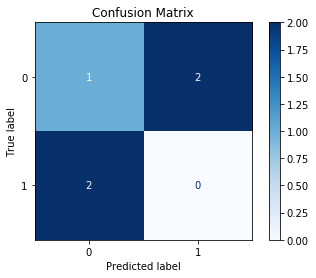

In [9]:
print('Las prediccion son un: ', metrics.accuracy_score(y_test, y_pred)*100, '% certeras')
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

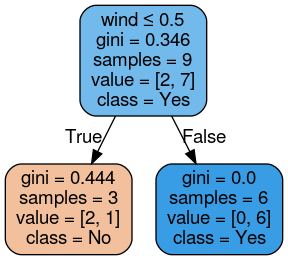

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns,class_names=data_rows)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

## ¿Qué resultado se obtiene para las siguientes condiciones?

- Outlook: Rain
- Temperature: Cool
- Humidity: Normal
- Wind: Strong


# Conclusion Metodo Bayesiano

El conjunto de datos es demasiado pequeño por lo que no se puede realizar un prediccion certera.

# Conclusión

1) En este caso, se logra un mejor resultado que le metodo bayesiano, ya que para un test_size de 0,3 el anterior mencionado, logró una certeza del 20% y utilizando arboles de decisión podemos lograr un 40%.

2) La profundidad optima del arbol es de 2 (El maximo), ya que con 1, la certeza es del 20%.

3) No hay diferencia alguna en la exactitud entre usar el metodo por ganancia o por gini.

Aún así el el árbol de decisión sigue presentando resultados inexactos a la hora de predecir un resultado.